## In this notebook we will perform an aglomerative clustering using scikit-learn

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

from sklearn.datasets import load_iris
from sklearn.datasets import fetch_openml

from scipy.cluster.hierarchy import linkage, fcluster

import umap 
import umap.plot as uplot

plt.rcParams['figure.figsize'] = [9, 5]
sns.set_theme()

/opt/anaconda3/envs/venvum/lib/python3.10/site-packages/numba/np/ufunc/dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
/opt/anaconda3/envs/venvum/lib/python3.10/site-packages/numba/np/ufunc/dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
/opt/anaconda3/envs/venvum/lib/python3.10/site-packages/numba/np/ufunc/dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, e

In [2]:
# Load iris dataset
iris = load_iris()

# Load iris dataset
iris_df = pd.DataFrame(
    iris['data'],
    columns=iris['feature_names']
)

numer_cols = iris_df.columns

# Load iris label
iris_df['label'] = iris['target_names'][iris['target']]

Text(0.5, 1.0, 'Scatterplot with true label')

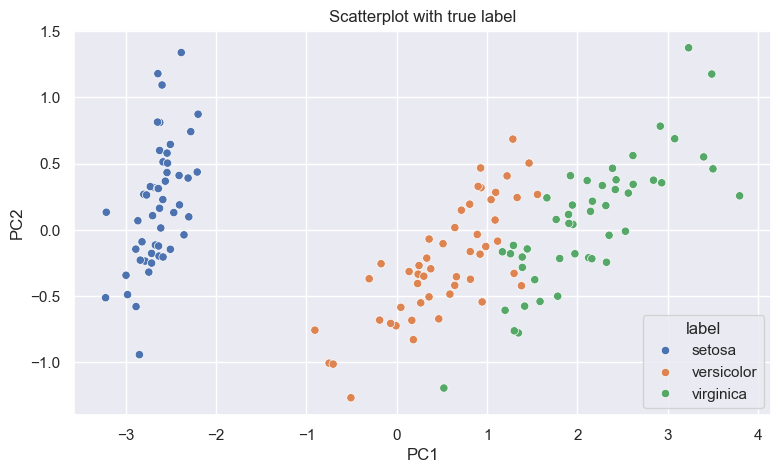

In [3]:
# Run PCA so we can show dataset in 2D space
pca = PCA(n_components=2)
pca_data = pca.fit_transform(iris_df[numer_cols].values)
pca_data = np.column_stack([pca_data, iris_df['label'].values])
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'label'])

# Plot and colour based on reference label
sns.scatterplot(pca_df, x='PC1', y='PC2', hue='label')
plt.title('Scatterplot with true label')

ARI : 0.5637510205230709


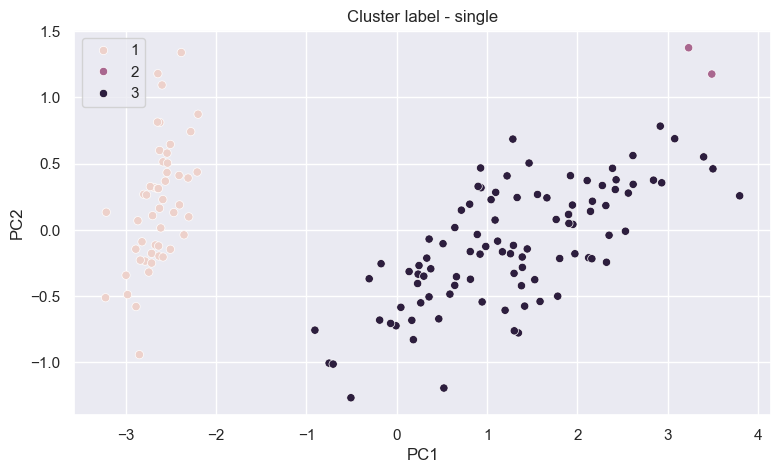

ARI : 0.6422512518362898


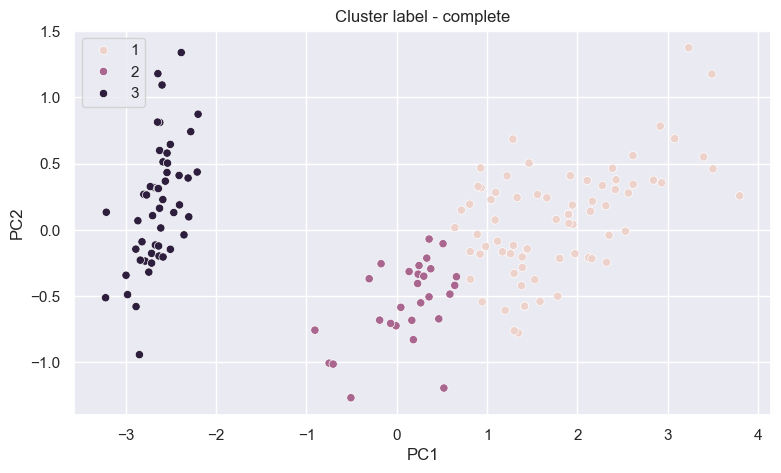

ARI : 0.7591987071071522


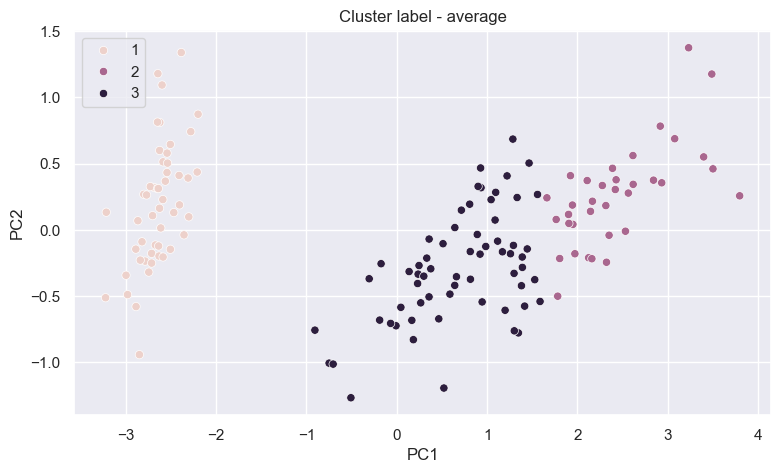

ARI : 0.7311985567707746


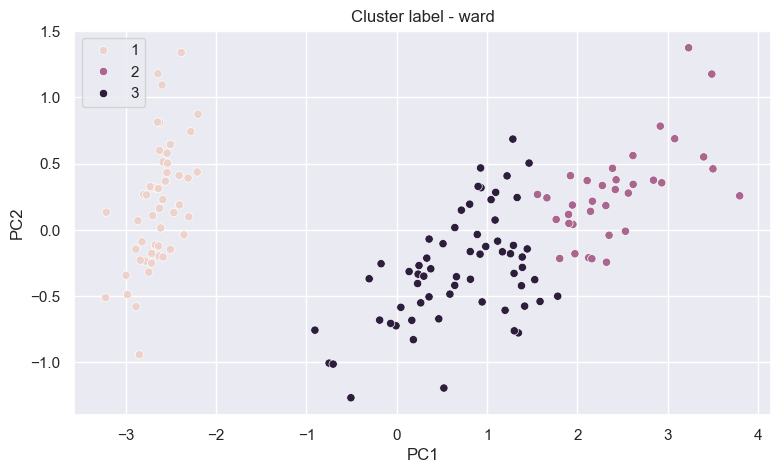

In [4]:
methods = ['single', 'complete', 'average', 'ward']

for method in methods:

    linkage_matrix = linkage(iris_df[numer_cols], method=method)
    clusters = fcluster(linkage_matrix, t=3, criterion='maxclust')
    
    ari = adjusted_rand_score(
        iris_df['label'].to_numpy(),
        clusters
    )

    print('ARI : ' + str(ari))

    # Plot and colour based on reference label
    plt.figure()
    sns.scatterplot(pca_df, x='PC1', y='PC2', hue=clusters)
    plt.title('Cluster label - ' + method)
    plt.show()

## Digit dataset

In [5]:
# Load digits data
mnist = fetch_openml('mnist_784', parser='auto')

# Normalize digits data
digits_data = mnist.data/255
digit_labels = mnist.target

# Subset the dataset
digit_labels_df = pd.DataFrame(digit_labels)

label_subset_df = digit_labels_df.groupby('class').head(500)

digits_data = digits_data.loc[label_subset_df.index, :].reset_index(drop=True)
digit_labels = label_subset_df['class'].to_numpy()

<Axes: >

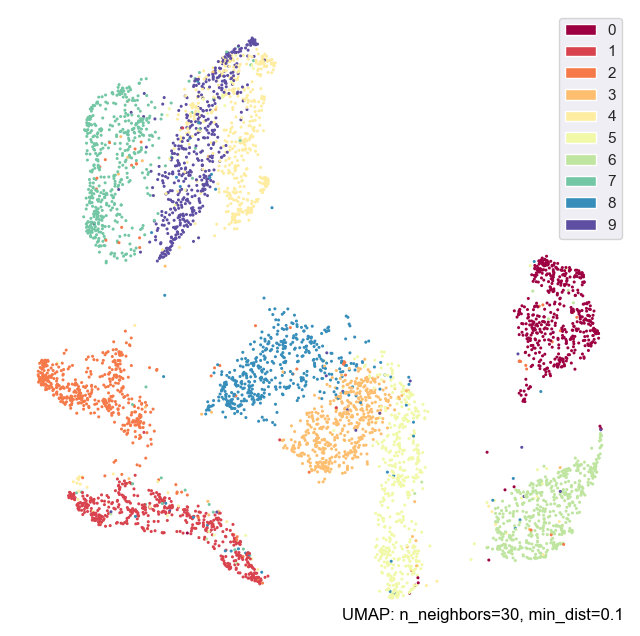

In [6]:
# Embed dataset
mnist_umap = umap.UMAP(n_neighbors=30)
embedding = mnist_umap.fit_transform(digits_data)

# Plot 2D embedding
uplot.points(mnist_umap, labels=digit_labels)

ARI = 7.249519851737537e-08


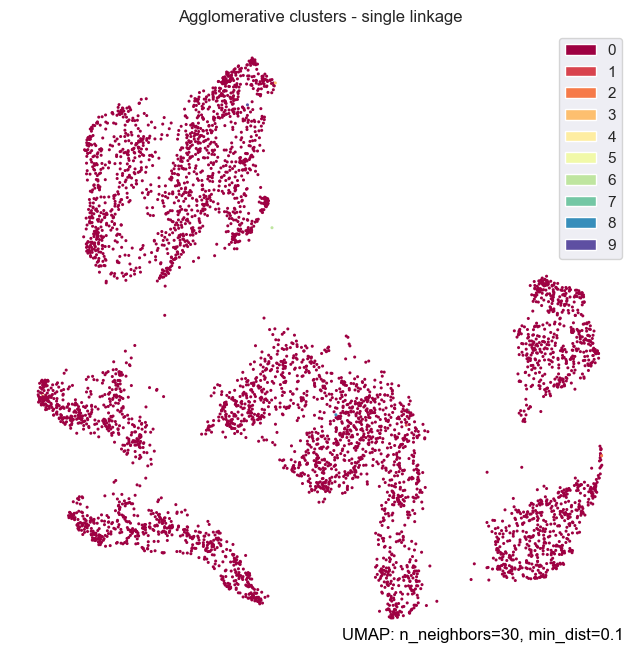

In [7]:
# Perform hierarchical clustering for single linkage
clustering = AgglomerativeClustering(
    n_clusters=10, linkage='single', 
).fit(digits_data)

print('ARI = {}'.format(adjusted_rand_score(clustering.labels_, digit_labels)))
uplot.points(mnist_umap, labels=clustering.labels_)
_ = plt.title('Agglomerative clusters - single linkage')

ARI = 0.15777822431598285


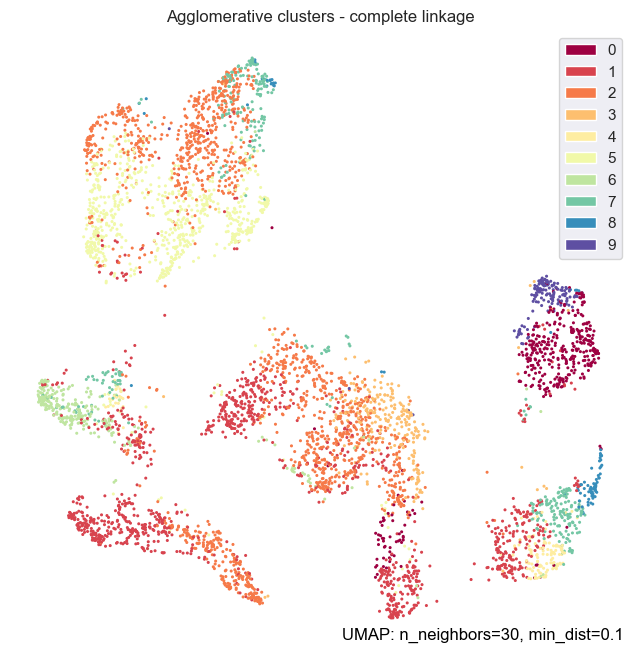

In [8]:
# Perform hierarchical clustering with complete linkage
clustering = AgglomerativeClustering(
    n_clusters=10, linkage='complete'
).fit(digits_data)

print('ARI = {}'.format(adjusted_rand_score(clustering.labels_, digit_labels)))
uplot.points(mnist_umap, labels=clustering.labels_)
_ = plt.title('Agglomerative clusters - complete linkage')

ARI = 0.04417339487518105


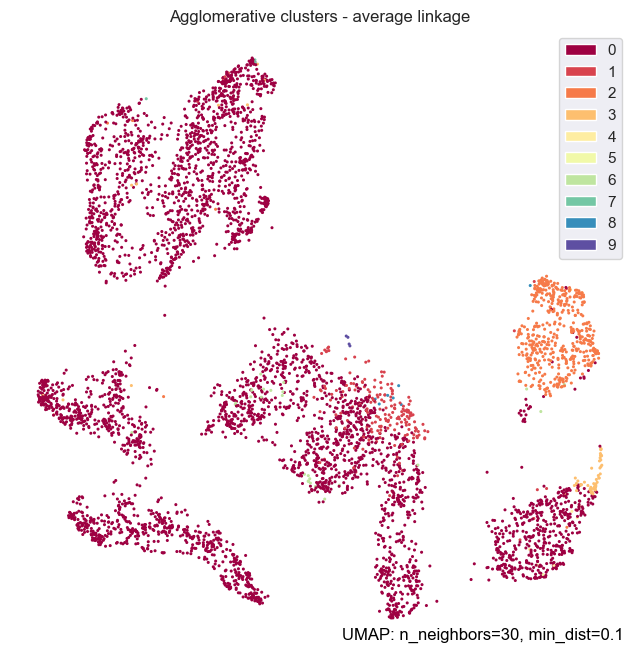

In [9]:
# Perform hierarchical clustering with average linkage
clustering = AgglomerativeClustering(
    n_clusters=10, linkage='average'
).fit(digits_data)

print('ARI = {}'.format(adjusted_rand_score(clustering.labels_, digit_labels)))
uplot.points(mnist_umap, labels=clustering.labels_)
_ = plt.title('Agglomerative clusters - average linkage')

ARI = 0.5016084210255642


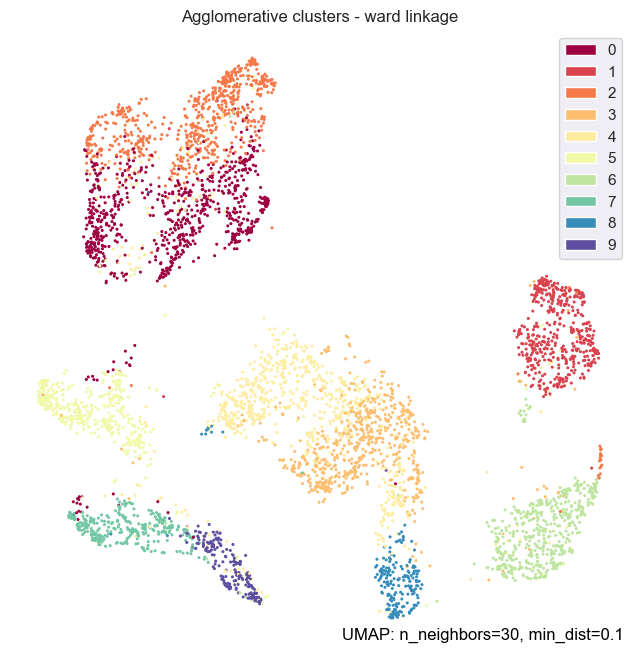

In [10]:
# Perform hierarchical clustering with ward linkage
clustering = AgglomerativeClustering(
    n_clusters=10, linkage='ward'
).fit(digits_data)

print('ARI = {}'.format(adjusted_rand_score(clustering.labels_, digit_labels)))
uplot.points(mnist_umap, labels=clustering.labels_)
_ = plt.title('Agglomerative clusters - ward linkage')